<a href="https://colab.research.google.com/github/alejandromtzmu8/ProgramacionAvanzada/blob/main/An%C3%A1lisis_de_Datos_Aplicables_al_Teorema_de_Na%C3%AFve_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Configuración inicial
pio.renderers.default = 'colab'  # Configura el renderizador predeterminado de Plotly para Colab
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8')
font = {'fontsize': 16, 'fontstyle': 'italic', 'backgroundcolor': 'black', 'color': 'orange'}

In [4]:
# Cargar los datos de películas
data = pd.read_csv('/content/movie_success_rate.csv')
print(f"data.shape: {data.shape}")
print(data.head())

# Crear un DataFrame y realizar análisis inicial
df = pd.DataFrame(data)
print(df.info())
print(df.isnull().sum().to_frame('Nan value'))

data.shape: (839, 33)
   Rank                    Title                     Genre  \
0   1.0  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1   2.0               Prometheus  Adventure,Mystery,Sci-Fi   
2   3.0                    Split           Horror,Thriller   
3   4.0                     Sing   Animation,Comedy,Family   
4   5.0            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors    Year  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014.0   
1  Noomi

In [5]:
# Eliminar filas con valores nulos en columnas clave
df.dropna(subset=['Rating', 'Revenue (Millions)', 'Metascore', 'Votes'], inplace=True)

# Análisis de columnas únicas
for col in df:
    print(f"{col}: {df[col].nunique()}")

# Descripción de las columnas numéricas y categóricas
print(df.describe(include=[np.number]).T)
print(df.describe(include=[object]).T)

Rank: 838
Title: 837
Genre: 189
Description: 838
Director: 524
Actors: 834
Year: 11
Runtime (Minutes): 90
Rating: 50
Votes: 837
Revenue (Millions): 789
Metascore: 82
Action: 2
Adventure: 2
Aniimation: 2
Biography: 2
Comedy: 2
Crime: 2
Drama: 2
Family: 2
Fantasy: 2
History: 2
Horror: 2
Music: 2
Musical: 2
Mystery: 2
Romance: 2
Sci-Fi: 2
Sport: 2
Thriller: 2
War: 2
Western: 2
Success: 2
                    count           mean            std     min         25%  \
Rank                838.0     485.247017     286.572065     1.0    238.2500   
Year                838.0    2012.507160       3.172360  2006.0   2010.0000   
Runtime (Minutes)   838.0     114.638425      18.470922    66.0    101.0000   
Rating              838.0       6.814320       0.877754     1.9      6.3000   
Votes               838.0  193230.251790  193099.005104   178.0  61276.5000   
Revenue (Millions)  838.0      84.564558     104.520227     0.0     13.9675   
Metascore           838.0      59.575179      16.952416    

<ipython-input-6-021ee5d0640c>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-6-021ee5d0640c>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




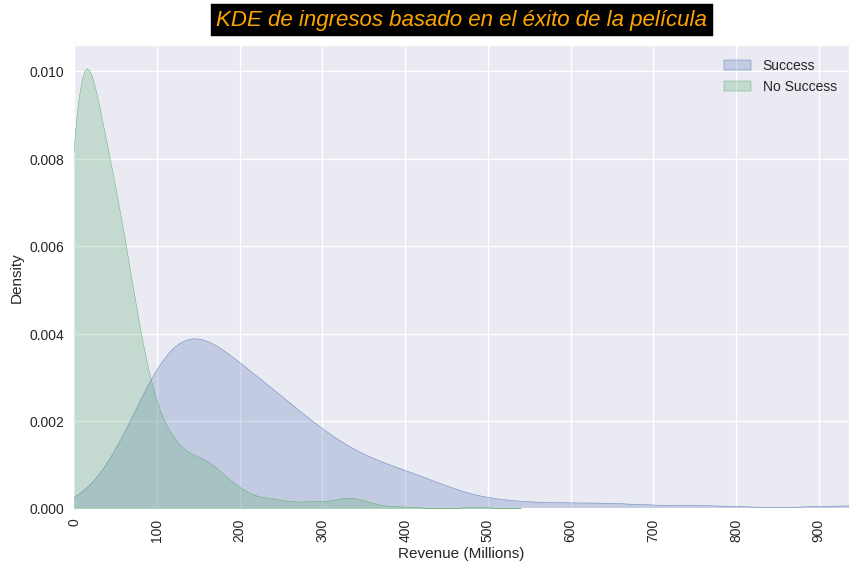

In [6]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Success'] == 1, 'Revenue (Millions)'], label='Success', shade=True)
sns.kdeplot(df.loc[df['Success'] == 0, 'Revenue (Millions)'], label='No Success', shade=True)
plt.title('KDE de ingresos basado en el éxito de la película', fontdict=font, pad=15)
plt.xticks(np.arange(0, df['Revenue (Millions)'].max(), 100), rotation=90)
plt.xlim([0, df['Revenue (Millions)'].max()])
plt.legend()
plt.show()

<ipython-input-7-07936080257e>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-7-07936080257e>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




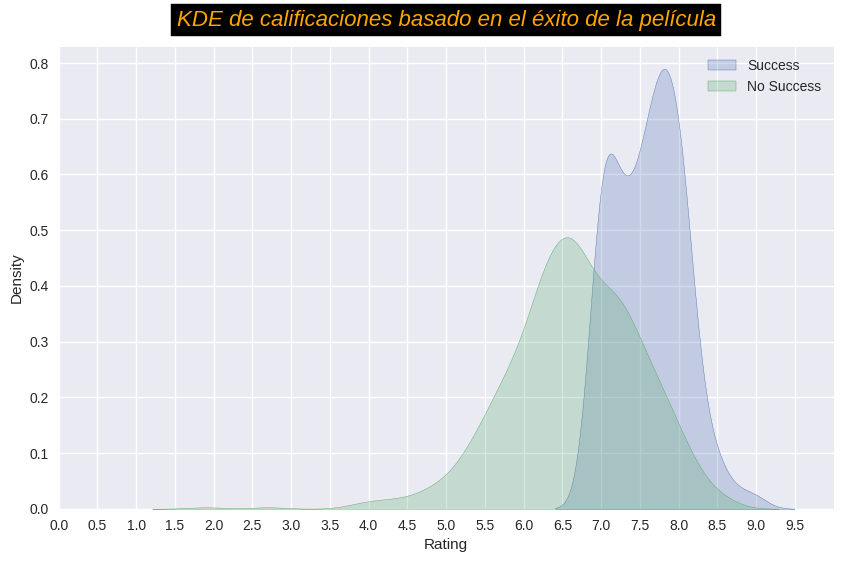

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Success'] == 1, 'Rating'], label='Success', shade=True)
sns.kdeplot(df.loc[df['Success'] == 0, 'Rating'], label='No Success', shade=True)
plt.title('KDE de calificaciones basado en el éxito de la película', fontdict=font, pad=15)
plt.xticks(np.arange(0, 10, 0.5))
plt.xlim([0, 10])
plt.legend()
plt.show()

<ipython-input-8-83188460cf7d>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-8-83188460cf7d>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




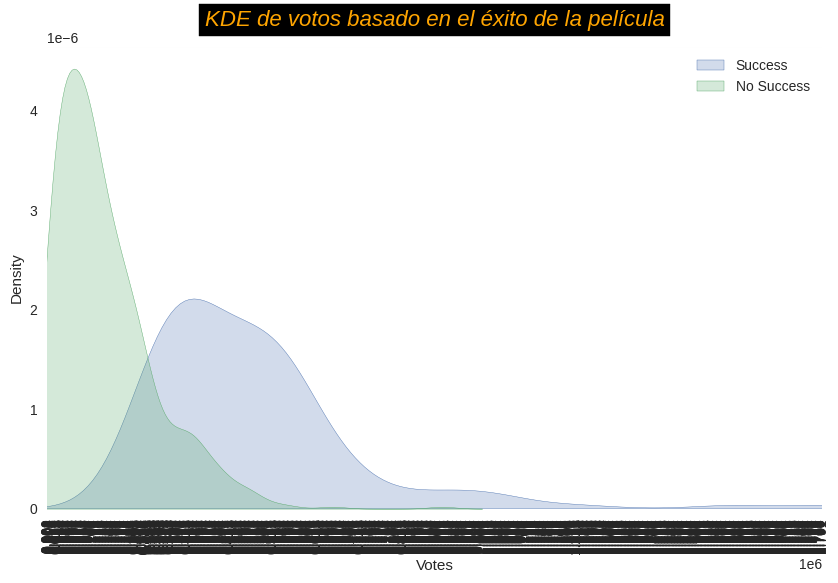

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Success'] == 1, 'Votes'], label='Success', shade=True)
sns.kdeplot(df.loc[df['Success'] == 0, 'Votes'], label='No Success', shade=True)
plt.title('KDE de votos basado en el éxito de la película', fontdict=font, pad=15)
plt.xticks(np.arange(0, df['Votes'].max(), 1000), rotation=90)
plt.xlim([0, df['Votes'].max()])
plt.legend()
plt.show()

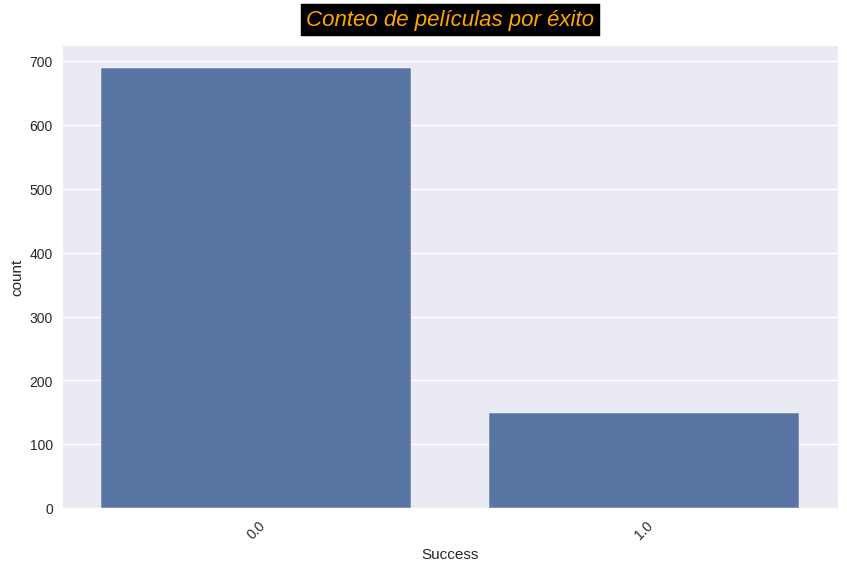

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Success')
plt.title('Conteo de películas por éxito', fontdict=font, pad=15)
plt.xticks(rotation=45)
plt.show()

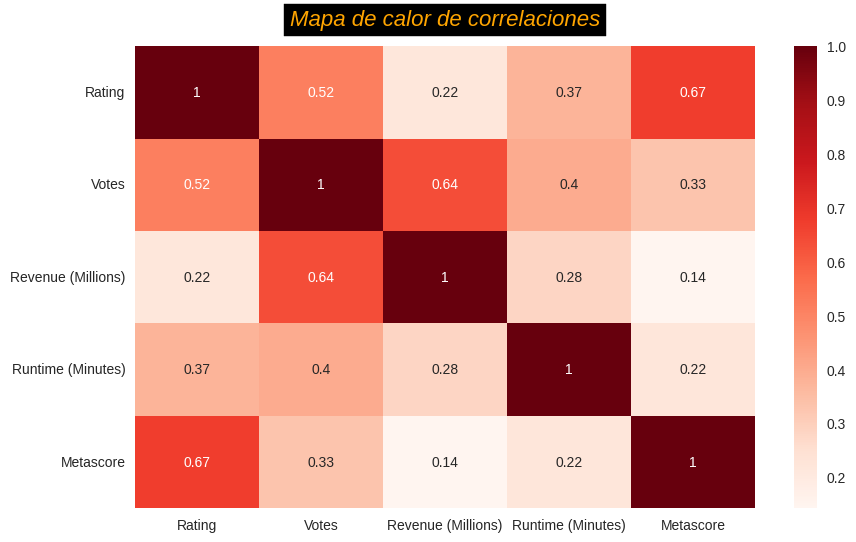

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Rating', 'Votes', 'Revenue (Millions)', 'Runtime (Minutes)', 'Metascore']].corr(), cmap='Reds', annot=True)
plt.title('Mapa de calor de correlaciones', fontdict=font, pad=15)
plt.show()

In [11]:
fig = px.scatter_3d(
    data_frame=df,
    x='Rating',
    y='Revenue (Millions)',
    z='Votes',
    color='Success',
    template='ggplot2',
    opacity=0.7,
    height=700,
    title='Distribución 3D de Rating, Revenue y Votes por Éxito'
)
fig.show()